## Installing some necessary libs

In [ ]:
!pip install algorithms
!pip install matplotlib
!pip install tqdm

## Imports

In [93]:
import matplotlib.pyplot as plt
import numpy as np
import timeit
import random
from algorithms.sort import bubble_sort, quick_sort
from tqdm import tqdm

## Defining functions and algorithms to analyze

In [94]:
def constant_func(input_array):
    return 0

def polynom (input_array, x):
    sum(np.array(input_array)*x)

def timsort(input_array):
    return np.sort(input_array, kind='stable')

def horner_polynom(input_array, x):
    np.polyval(input_array, x)

## Min Max Normalization

In [95]:
def normalize(array):
    return (array - np.amin(array)) / (np.amax(array) - np.amin(array) + 0.000000001)

## Setting constants

In [123]:
max_n = 500
mean_count=5

## Defining function to get execution time

In [124]:
def get_execution_time(algorithm, *args):
    start_time = timeit.default_timer()

    algorithm(*args)
        
    return timeit.default_timer() - start_time

## Get the execution time depending on size of input data 

In [125]:
def get_execution_time_array(algorithm, *args):
    times_array = []
    
    for n in tqdm(range (1, max_n +1)):
        input_array = [random.randrange(1, 50, 1) for i in range(n)]
        execution_time_summ = 0
        
        for m in range(1, mean_count):
            execution_time_summ += get_execution_time(algorithm, input_array, *args)
            
        execution_time_mean = execution_time_summ / mean_count
        times_array.append(execution_time_mean)
        
    return np.array(times_array)

In [126]:
def get_execution_time_of_matrix_product():
    times_array = []
    
    for n in tqdm(range (1, max_n +1)):
        A = np.random.randint(50, size=(n, n))
        B = np.random.randint(50, size=(n, n))
        execution_time_summ = 0
        
        for m in range(1, mean_count):
            start_time = timeit.default_timer()
            np.matmul(A,B)
            execution_time_summ += timeit.default_timer() - start_time
            
        execution_time_mean = execution_time_summ / mean_count
        times_array.append(execution_time_mean)
        
    return np.array(times_array)

## Plot Empirical and Theoretical time

In [127]:
n = np.arange(1, max_n + 1, 1)
def plot_time_graph(empirical, theoretical, name):
    fig, ax = plt.subplots()
    
    ax.plot(n, empirical, label = 'Empirical time')
    ax.plot(n, theoretical, label = 'Theoretical time')
    
    ax.set(xlabel='Array size', ylabel='Execution time',title=name)
    
    ax.legend()
    ax.grid()
    
    plt.show()

100%|█████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:03<00:00, 507.49it/s]


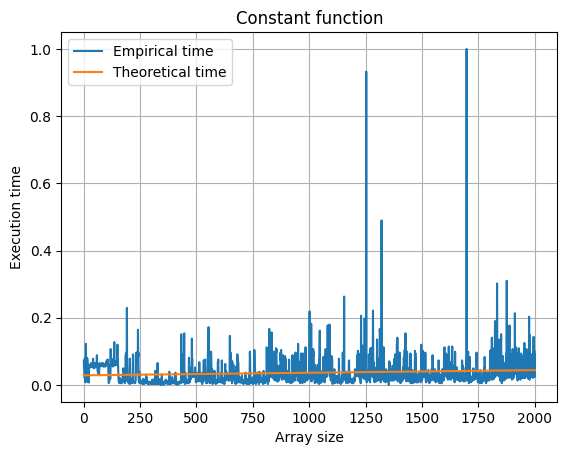

In [116]:
empirical_exec_time = get_execution_time_array(constant_func)
empirical_exec_time = normalize(empirical_exec_time) 

coaf = np.polyfit(n, empirical_exec_time, 1)
polynom_fn = np.poly1d(coaf)

plot_time_graph(empirical_exec_time, polynom_fn(n), 'Constant function')

100%|█████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:05<00:00, 388.50it/s]


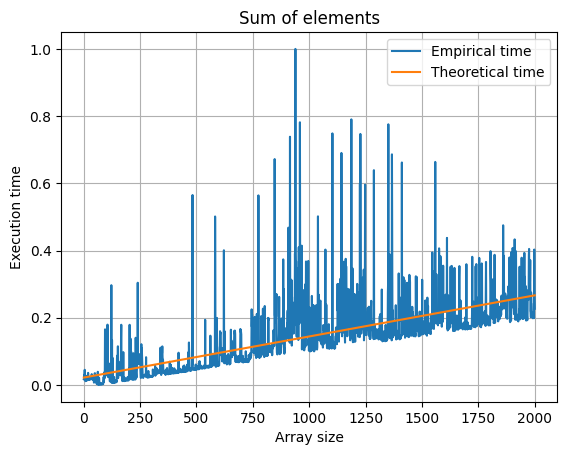

In [106]:
empirical_exec_time = get_execution_time_array(np.sum)
empirical_exec_time = normalize(empirical_exec_time) 

coaf = np.polyfit(n, empirical_exec_time, 1)
polynom_fn = np.poly1d(coaf)

plot_time_graph(empirical_exec_time, polynom_fn(n), 'Sum of elements')

100%|█████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:05<00:00, 390.40it/s]


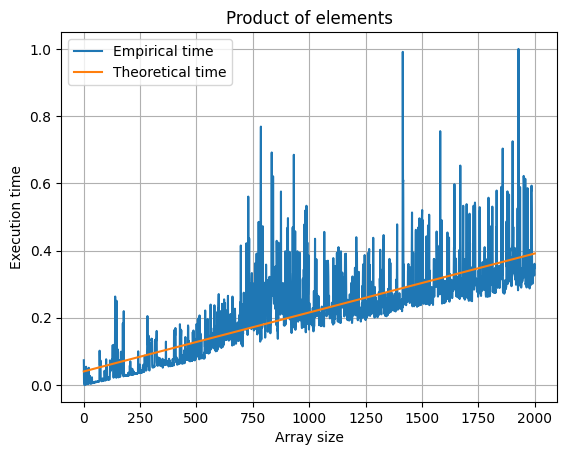

In [107]:
empirical_exec_time = get_execution_time_array(np.prod)
empirical_exec_time = normalize(empirical_exec_time) 

coaf = np.polyfit(n, empirical_exec_time, 1)
polynom_fn = np.poly1d(coaf)

plot_time_graph(empirical_exec_time, polynom_fn(n), 'Product of elements')

100%|█████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:06<00:00, 317.76it/s]


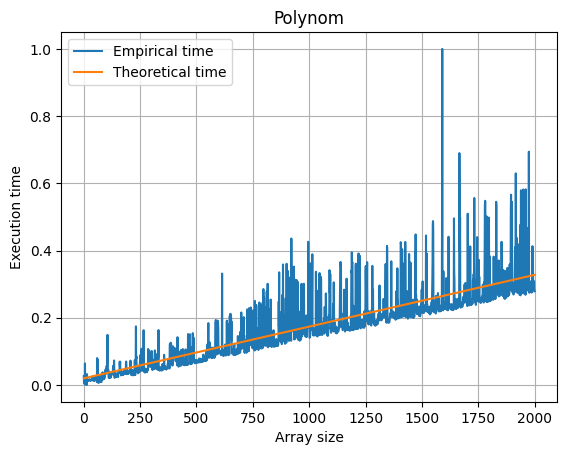

In [117]:
empirical_exec_time = get_execution_time_array(polynom, 1.5)
empirical_exec_time = normalize(empirical_exec_time) 

coaf = np.polyfit(n, empirical_exec_time, 1)
polynom_fn = np.poly1d(coaf)

plot_time_graph(empirical_exec_time, polynom_fn(n), 'Polynom')

 87%|███████████████████████████████████████████████████████████████████▋          | 1735/2000 [00:19<00:05, 48.58it/s]C:\Users\rkozl\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\polynomial.py:780: RuntimeWarning: overflow encountered in multiply
  return y
100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:25<00:00, 77.12it/s]


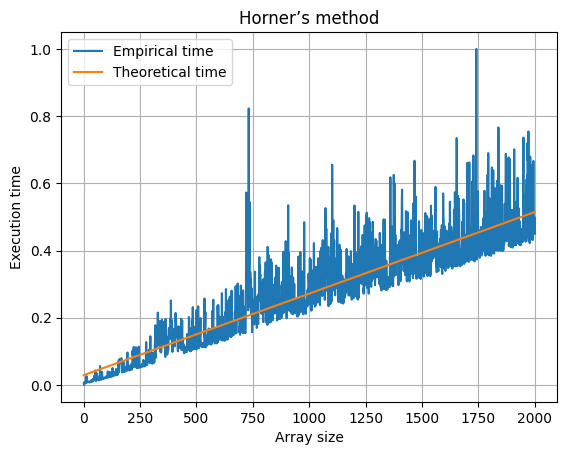

In [119]:
empirical_exec_time = get_execution_time_array(horner_polynom, 1.5)
empirical_exec_time = normalize(empirical_exec_time) 

coaf = np.polyfit(n, empirical_exec_time, 1)
polynom_fn = np.poly1d(coaf)

plot_time_graph(empirical_exec_time, polynom_fn(n), 'Horner’s method')

100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [10:47<00:00,  3.09it/s]


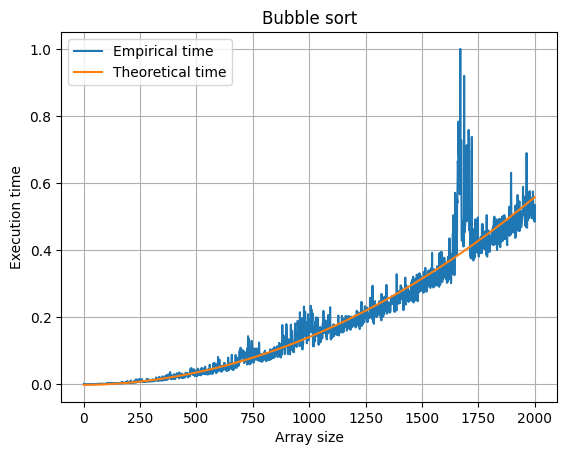

In [120]:
empirical_exec_time = get_execution_time_array(bubble_sort)
empirical_exec_time = normalize(empirical_exec_time) 

theoretical = normalize(n**2) 

coaf = np.polyfit(n, empirical_exec_time, 2)
polynom_fn = np.poly1d(coaf)

plot_time_graph(empirical_exec_time,  polynom_fn(n), 'Bubble sort')

100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [02:02<00:00, 16.35it/s]


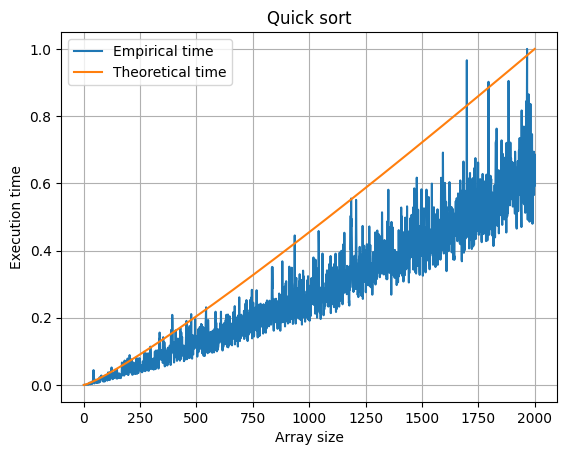

In [90]:
empirical_exec_time = get_execution_time_array(quick_sort)
empirical_exec_time = normalize(empirical_exec_time) 

theoretical = normalize(n*np.log(n)) 

plot_time_graph(empirical_exec_time, theoretical, 'Quick sort')

100%|█████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:05<00:00, 363.24it/s]


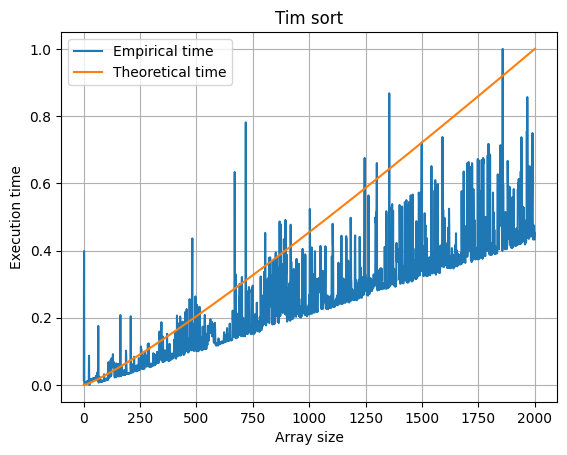

In [121]:
empirical_exec_time = get_execution_time_array(timsort) 

empirical_exec_time = normalize(empirical_exec_time) 

theoretical = normalize(n*np.log(n)) 

plot_time_graph(empirical_exec_time, theoretical, 'Tim sort')

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [03:31<00:00,  2.36it/s]


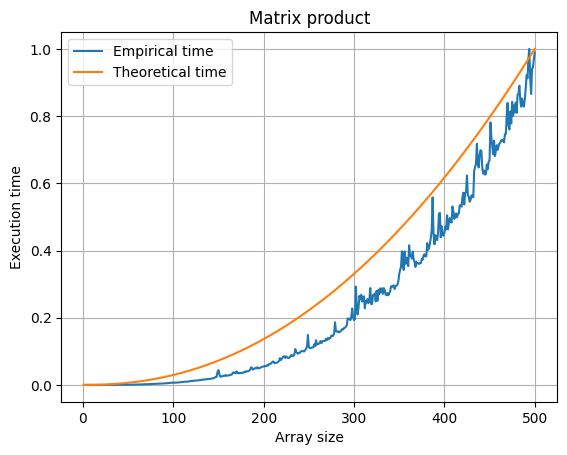

In [128]:
empirical_exec_time = get_execution_time_of_matrix_product() 
empirical_exec_time = normalize(empirical_exec_time) 

theoretical = normalize(n**2*np.log(n)) 

plot_time_graph(empirical_exec_time, theoretical, 'Matrix product')
